# Finales Projekt "Fake News Detection"

* Vorgelegt von: Marc Friz (), Botan Babat (), Nadja Herrmann (40523)
* Vorgelegt bei: Dr. Johannes Maucher
* Vorgelegt am: 05.01.2021

### Inhaltsverzeichnis

1. Einleitung  
1.1 Problemstellung und Ziel der Arbeit V:Botan  
1.2 Aufbau der Arbeit V: Nadja ERLEDIGT  
1.3 Literaturrecherche V: jeder bring suchwörter ein falls fehlend  
2. Datenbeschaffung V: jeder stichpunkte wie in aufgabenteil 2 beschrieben  
2.1 Datensatz 1  ERLEDIGT  
2.2 Datensatz 2  
2.3 Datensatz 3 
3. Einführung der benötigten Bibliotheken - Was das Paket macht V: Jeder mit kurzer Erklärung  
4. Pakete importieren V: Marc alle Pakete zusammengefasst in einem Schritt  
5. Datenbereitstellung  
5.1 Datensatz 1  
5.2 Datensatz 2  
5.3 Datensatz 3  
5.4 Zusammenfassung der Daten in einen Datensatz (Marc)  
6. Datenanalyse  
6.1 Datenbereistellung  
6.2 Beschreibung des bereitgestellten Datensatzes V: jeder  
6.3 Datenbereinigung und Vorbereitung V: Marc  
6.3 Worthäufigkeiten V: Marc  
6.4 N-Gramm Ranking  
6.5 Association Rule  
7. Interpretation der Ergebnisse  
8. Ausblick V: Jeder  
9. Quellenverzeichnis V: Jeder  

### 1. Einleitung

Heutzutage werden Nachrichten über unterschiedliche Medien an die Masse verteilt. Medien sind zum Beispiel die sozialen Medien oder auch Online-Blogs. Einerseits führen der einfache Zugang und die schnelle Verbreitung von Nachrichten dazu, dass viele Menschen die Nachrichten konsumieren. Auf der anderen Seite aber wird dadurch die schnelle Verbreitung von "Fake News" begünstigt. 

Fake News sind Nachrichten von geringer Qualität und mit absichtlich falschen Informationen. Fake News sind aber keine Neuheit. Vor des digitalen Zeitalters wurden sie hauptsächlich durch Boulevardjournalismus verbreitet. Die Verbreitung von Fake News hängt mit der Verfügbarkeit von digitalen Werkzeugen der Massenmedien zusammen.  Die weite Verbreitung von Fake News kann negative Auswirkungen auf Individuen und die Gesellschaft haben. Daher ist die Erkennung solcher Nachrichten von hoher Relevanz (Shu et al, 2017).

#### 1.1 Problemstellung und Ziel der Arbeit

Die Folgen der Verbreitung von Fake News können von bloßem Ärgernis bis hin zur Beeinflussung und Irreführung von Gesellschaften oder sogar Nationen reichen. Es gibt eine Vielzahl von Ansätzen, um Fake News zu identifizieren. Viele bauen auf die Verwendung von Lernalgorithmen auf.

In diesem Projekt werden wir die Hauptprobleme bei der Erkennung von Fake News analysieren und diskutieren. Wir werden mittels statistischen Methoden Fake News untersuchen und diese mit True News vergleichen. Mit den Ergebnissen der Analyse werden wir die manuelle Vorgehensweise zur Erkennung der Fake News bewerten.

#### 1.2 Aufbau der Arbeit

Diese Arbeit beschreibt im ersten Teil nach einer kurzen Motivation und Problemstellung das Ziel der Arbeit. In Kapitel zwei wird die Datenbeschaffung beschrieben. In Kapitel drei wird die Notwendigkeit der Python Pakete beschrieben, die im darauffoldenden Kapitel importiert werden. In Kapitel fünf werden die drei einzelnen Datensätze kurz beschrieben und zu einem Datensatz zusammengefasst. In Kapitel sechs wird die Datenanalyse beschrieben. Teil hiervon ist eine detaillierte Beschreibung sowie die Bereinigung des Datensatzes. Des Weiteren werden unterschiedliche Analysemöglichkeiten aufgezeigt. Hierzu zählen die Betrachtung der Worthäufigkeiten, N-Gramm Ranking und die Association Rule. Im darauffolgenden Kapitel folgt die Interpretation der Ergebnisse. Der Abschluss der Arbeit ist eine Schlussbetrachtung mit einem kurzen Ausblick.  

#### 1.3 Literaturrecherche

Der Zweck dieser Arbeit ist es, Ansätze zur Identifizierung von Fake News zu betrachten. Dazu wurde eine Literaturrecherche durchgeführt. In diesem Abschnitt werden die verwendeten Suchbegriffe vorgestellt.

##### Suchbegriffe

* 'Fake News', ('Was sind Fake News', 'Synonyme für Fake News', 'Problemstellung Fake News', 'Auswirkungen und Folgen von Fake News')  


* 'Fake News Detection', ('Approaches to identify Fake News', 'Approaches to identify missleaded News', 'Finding Fake News', 'Identify Fake News', 'Data Science Fake News Detection', 'machine learning fake news detection', )


* 'Text Mining', ('Natural Language Processing bei Fake News', 'Text mining Fake news', 'Text mining in Python3, 'Data Preparation', Data Exploration in Python', 'n-grams mit Python', 'Association Rule mit Python', 'Worthäufigkeiten analysieren mit Python', 'Word2Vec', 'Datenbereinigung mit Python', 'Data Cleaning in Python', 'Developing a Data Science Model to Predict Fake News', 'Using Random Forest, GridSearchCV, Python, and NLP for fake news detection', 'Stemming', 'Tokenizing', 'Eliminating Stopwords', 'Association Rule Mining via Apriori Algorithm in Python') 

### 2. Datenbeschaffung

Für das Projekt werden bereits bestehende Datensätze herangezogen. Diese Datensätze entstehen aus unterschiedliche Quellen (Statista, Kaggle). Die Datensätze beinhalten Nachrichten von unterschiedlichen amerikanischen Nachrichtensendern. Des weiteren enthalten die Datensätze falsche Nachrichten (Fake Nachrichten). Diese Nachrichten sind falsch, da sich eine falsche/fehlerhafte Aussage darin befindet. Die Nachrichten sind  in falsch und richtig gelabelt. 
Im weiteren Verlauf der Arbeit verwenden wir hierfür die englische Bezeichnung false und true. Da der Fokus dieser Arbeit ist, Besonderheiten der Fake Nachrichten zu identifizieren um dadurch die Einteilung der Nachrichten automatisch durchführen zu können, werden schon bereits gelabelte Datensätze verwendet. 

Die unterschiedlichen Datensätze wurden mit Hilfe der Suchmaschine "Google Dataset Search" gefunden. 

#### 2.1 Datensatz 1

Der  erste Datensatz wurde von Kaggle bezogen. Unter dem folgenden Link können die Daten sowie die dazugehörige Beschreibung eingesehen werden: https://www.kaggle.com/anthonyc1/fake-news-classifier-final-project.
Der Datensatz enthält Text und Metadaten von 244 Webseiten, die von der BS Detector Chrome Extension von Daniel Sieradski als "Fake" markiert wurden. Bereitgstellt wurde dieser Datensatz von Meg Risdal (Produktmanagerin, Kaggle). Die "real" Daten wurden von unterschiedlichen Nachrichtenseiten gecrawlt und hinzugefügt. Die Quelle hierfür ist nicht vorhanden. Bereitgestellt und verarbeitet wurden die Daten von Anthony Chan. Siehe Link: https://www.kaggle.com/anthonyc1/fake-news-classifier-final-project.

#### 2.2 Datensatz 2



#### 2.3 Datensatz 3
Auch der dritte Datensatz wurde von Kaggle bezogen. Die Daten wurden von Clément Bisaillon bereitgestellt und können unter folgendem Link aufgerufen werden: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset/metadata  
Der Datensatz enthält zwei Arten von Artikeln, gefälschte und echte Nachrichten. Dieser Datensatz wurde aus Quellen der realen Welt gesammelt. Die wahrheitsgemäßen Artikel wurden durch Crawlen von Artikeln von Reuters.com (Nachrichten-Website) gewonnen. Die Fake-News-Artikel wurden aus verschiedenen Quellen gesammelt. Die gefälschten Nachrichtenartikel wurden von unzuverlässigen Websites gesammelt, die von Politifact (einer Organisation zur Überprüfung von Fakten in den USA) und Wikipedia gekennzeichnet wurden. Der Datensatz enthält verschiedene Arten von Artikeln zu unterschiedlichen Themen, die Mehrheit der Artikel konzentriert sich jedoch auf politische und Weltnachrichten-Themen.  
Der Datensatz besteht aus zwei CSV-Dateien. Die erste Datei namens "True.csv" enthält mehr als 12.600 Artikel von reuter.com. Die zweite Datei mit dem Namen "Fake.csv" enthält mehr als 12.600 Artikel aus verschiedenen Fake-News-Quellen. Jeder Artikel enthält die folgenden Informationen: Artikeltitel, Text, Typ und das Datum, an dem der Artikel veröffentlicht wurde.  
Siehe Link: https://www.uvic.ca/engineering/ece/isot/assets/docs/ISOT_Fake_News_Dataset_ReadMe.pdf

### 3. Einführung der benötigten Bibliotheken

- Pandas ist eine Python-Bibliothek, die zum Auswerten und Bearbeiten tabellarischer Daten gedacht ist. Pandas wird dazu benötigt um ein Objekt (Dataframe) zu erstellen und dieses komfortabel zu bearbeiten

- Matplotlib ist eine Python-Bibliothek zum Plotten von 2D-Plots 

- Seaborn ist eine Bibliothek zur Datenvisualisierung (Zeichnung von Grafiken), die auf matplotlib basiert
- re (Reguläre Ausdrücke) ist eine Standardbibliothek, die zahlreiche Funktionen und Methoden zum Arbeiten mit regulären Ausdrücken zur Verfügung stellt

- Das NLTK  (Natural Language Toolkit)  ist eine Zusammenstellung von Bibliotheken und Programmen der Programmiersprache Python  zur verarbeitung der Daten in natürlicher Sprache
- Das String-Modul enthält eine Reihe von Funktionen zur Verarbeitung von Standard-Python-Strings

- Das Modul UnicodeData ermöglicht den Zugriff auf die Unicode-Zeichendatenbank (UCD), die Zeicheneigenschaften für alle Unicode-Zeichen definiert.

- NumPy ist eine Programmbibliothek, die eine einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays ermöglicht. Neben den Datenstrukturen bietet NumPy auch effizient implementierte Funktionen für numerische Berechnungen an

### 4. Pakete importieren

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/botanbabat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/botanbabat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 5. Datenbereitstellung
#### 5.1 Nadja

Die extrahierten Daten werden in dem Basis Format in JupyterNotebook geladen und als Dataframe dargestellt.

In [15]:
news = pd.read_csv("../DataSet/news_dataset_Nadja.csv", encoding="latin-1")
news

,Unnamed: 0,title,content,publication,label
0,0,Muslims BUSTED: They Stole Millions In Govât...,Print They should pay all the back all the mon...,100percentfedup,fake
1,1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
...,...,...,...,...,...
28706,15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
28707,15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
28708,15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
28709,15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


Durch die Funktion .shape werden die Dimensionen des Objekts angezeigt.

In [16]:
news.shape

(28711, 5)

Das Objekt besteht aus 28711 Zeilen und 5 Spalten. Im nächsten Schritt werden die Spalten herausgegeben.

In [17]:
news.columns

Index(['Unnamed: 0', 'title', 'content', 'publication', 'label'], dtype='object')

#### Umbenennung der Spaltenbezeichnung zur Vereinheitlichung der Basisdaten. 

Zielformat CSV mit Spaltenbezeichnung: Title, text, source, veracity

In [18]:
dfnews=news.rename(columns={'content':'text','publication':'source','label':'veracity'})
dfnews.head()

,Unnamed: 0,title,text,source,veracity
0,0,Muslims BUSTED: They Stole Millions In Govât...,Print They should pay all the back all the mon...,100percentfedup,fake
1,1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


Umbenennung der Werte Fake und Real in False und True.

In [19]:
dfnews.loc[dfnews['veracity']== 'fake','veracity']='false'
dfnews.loc[dfnews['veracity']== 'real','veracity']='true'
dfnews.head()

,Unnamed: 0,title,text,source,veracity
0,0,Muslims BUSTED: They Stole Millions In Govât...,Print They should pay all the back all the mon...,100percentfedup,false
1,1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,false
2,2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,false
3,3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,false
4,4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,false


Erstellung eines DataFrames mit den Spalten Title, Text, Source und Veracity.

In [20]:
dfnewsfinal=dfnews[['title','text','source','veracity']]
dfnewsfinal.head()

,title,text,source,veracity
0,Muslims BUSTED: They Stole Millions In Govât...,Print They should pay all the back all the mon...,100percentfedup,false
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,false
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,false
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,false
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,false


Der Datensatz ist jetzt bereit zur Zusammenführung.

#### 5.2 Marc

In [21]:
# data_path = '../DataSet/BuzzFeed_Corpus_2016/articles/'

# all_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

In [22]:
# def get_xml_tags(path):
#     doc = minidom.parse(path)
#     # Title
#     try:
#         title = (doc.getElementsByTagName('title')[0].firstChild.data)
#     except:
#         title = ''
        
#     # Text
#     try:
#         text = (doc.getElementsByTagName('mainText')[0].firstChild.data)
#     except:
#         text = ''
        
#     # quelle
#     try:
#         source = (doc.getElementsByTagName('uri')[0].firstChild.data)
#     except:
#         source = ''
        
#     # veracity
#     try:
#         veracity = (doc.getElementsByTagName('veracity')[0].firstChild.data)
#     except:
#         veracity = ''
    
#     return title, text, source, veracity    

In [23]:
# l_title = []
# l_text = []
# l_quelle = []
# l_veracity = []

# for i in all_files:
#     title, text, source, veracity = get_xml_tags(data_path + i)
#     l_title.append(title)
#     l_text.append(text)
#     l_quelle.append(source)
#     l_veracity.append(veracity)

In [24]:
# df = pd.DataFrame(list(zip(l_title, l_text, l_quelle, l_veracity)), columns =['title', 'text', 'source', 'veracity']) 
# df.head()

In [25]:
# def set_veracity(verasity):
#     if verasity.find('false') >= 0:
#         return 'false'
#     elif verasity.find('true') >= 0:
#         return 'true'
#     else:
#         return ''

In [26]:
# df['veracity'] = df['veracity'].apply(set_veracity)
# df.head()

#### 5.3 Botan

Die extrahierten Daten werden aus der  bereitgestellten .csv (True.csv) in JupyterNotebook geladen und als Dataframe dargestellt.

In [35]:
rawData_true= pd.read_csv ("../DataSet/Kaggle_Botan/True.csv")


Um einen schnellen Überblick der Daten zu erhalten wird im ersten Schritt die .head() Funktion von Panda angewendet, die die ersten Zeilen des Dataframes ausgibt. Die Daten sind in folgende Spalten gegliedert:  Title, Text, Subject und Date.  Wird nur der Inhalt der Spalte "Text" betrachtet , so ist zu erkennen, dass zu Beginn des Textes die Quelle der Nachricht angegeben ist. 

In [36]:
rawData_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Die Funktion info() wird verwendet, um eine Zusammenfassung des DataFrames "rawData_true" zu erhalten. Diese Methode gibt Informationen über den Dataframe aus, einschließlich des Index-D-Typs und der Spalten-D-Typen, der Nicht-Null-Werte und der Speichernutzung.

In [37]:
rawData_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


Um das Zielformat CSV mit Spaltenbezeichnung: title, text, source, veracity zu erhalten, werden die Daten in den kommenden Schritten verarbeitet.

Schritt 1: Das Dataframe wird um die Spalte "veracity" erweitert. Anschließend werden alle Zeilen des Dataframes mit "true" gelabelt.

In [38]:
prepData_true= rawData_true
prepData_true["veracity"]= "true"
prepData_true.head()

,title,text,subject,date,veracity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


Schritt 2: Das Dataframe wird um die Spalte "source" erweitert. 

In [39]:
prepData_true["source"]= ""
prepData_true.head()

,title,text,subject,date,veracity,source
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true,
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true,
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true,


Um die Quellenangabe für jede Nachricht zu erhalten, wird der Inhalt der Spalte "Text" mithilfe von regulären Ausdrücken in Text und Quelle separiert. Die Quellenangabe wird anschließend der Spalte "Source" zugewiesen.

In [40]:
match=0
nomatch= 0
rownumber= 0
findrows_nomatch = []
for index, row in prepData_true.iterrows():
    if "(Reuters)" in row.text: # Sucht nach "Reuters" im Text
        if " - " in row.text: # Trennung an der Stelle "-" in Quelle und Text 
            regex = r" - " 
            quelle = re.split(regex,row.text)[0] # Quelle 
            text = re.split(regex,row.text)[1]  # Text 
            row.source = quelle 
            row.text = text
            match= match + 1
    else:
        nomatch= nomatch +1 
        findrows_nomatch.append(rownumber)
   
    rownumber= rownumber + 1 

In [41]:
prepData_true.head()

,title,text,subject,date,veracity,source
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",true,WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",true,WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",true,WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",true,WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",true,SEATTLE/WASHINGTON (Reuters)


Schritt 3: Die Spalten des Dataframes werden neu angeordnet in   'title','text','quelle','veracity','subject' und 'date'.

In [44]:
prepData_true= prepData_true[['title','text','source','veracity','subject','date']]

prepData_true.head()

,title,text,source,veracity,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,WASHINGTON (Reuters),true,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,SEATTLE/WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"


Schritt 4: Für die weitere Vorgehensweise wird eine explorative Datenanalyse der vorliegenden Daten durchgeführt.

In [46]:
print("Anzahl Nachrichten die von der Quelle Reuters stammen: {}".format(match))

Anzahl Nachrichten die von der Quelle Reuters stammen: 21247


In [48]:
print("Anzahl der Nachrichten ohne Quellenangabe oder die nicht von Reuters stammen: {}".format(nomatch))

Anzahl der Nachrichten ohne Quellenangabe oder die nicht von Reuters stammen: 170


Das folgende Beispiel zeigt eine Nachricht die nicht von Reuters stammt. Es handelt sich hierbei um ein Tweet:

In [52]:
print(prepData_true["text"][11340])

The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - Based on the fact that the very unfair and unpopular Individual Mandate has been terminated as part of our Tax Cut Bill, which essentially Repeals (over time) ObamaCare, the Democrats & Republicans will eventually come together and develop a great new HealthCare plan! [0658 EST] - WOW, @foxandfrlends  Dossier is bogus. Clinton Campaign, DNC funded Dossier. FBI CANNOT (after all of this time) VERIFY CLAIMS IN DOSSIER OF RUSSIA/TRUMP COLLUSION. FBI TAINTED.  And they used this Crooked Hillary pile of garbage as the basis for going after the Trump Campaign! [0824 EST] - All signs are that business is looking really good for next year, only to be helped further by our Tax Cut Bill. Will be a great year for Companies and JOBS! Stock Marke

Schritt 5: Weiterführende Datenverarbeitung

Es werden nur Nachrichten mit Quellenangaben (Reuters) extrahiert. 

In [55]:
prepData_true_1 = prepData_true.drop(findrows_nomatch)


Der Fokus wird auf politische Themen gesetzt.

In [56]:
prepData_true_1 = prepData_true_1.loc[prepData_true_1['subject'] == "politicsNews"]

In [59]:
prepData_true_1.head()

,title,text,source,veracity,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,WASHINGTON (Reuters),true,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,SEATTLE/WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"


Zuletzt wird der Datensatz mit Fake.csv in ein Dataframe geladen und verarbeitet.

In [79]:
rawData_false= pd.read_csv ("../DataSet/Kaggle_Botan/Fake.csv")

 Das Dataframe wird um die Spalte "veracity" und "source" erweitert. Anschließend werden alle Zeilen des Dataframes mit "false" gelabelt.

In [78]:
prepData_false= rawData_false
prepData_false["veracity"]= "false"
prepData_false["source"]= ""
prepData_false= prepData_false[['title','text','source','veracity','subject','date']]

Die Datensätze sind jetzt bereit zur Zusammenführung.

Fake-Nachrichten

In [70]:
 prepData_false.head()

,title,text,source,veracity,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,,false,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,,false,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",,false,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",,false,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,,false,News,"December 25, 2017"


True-Nachrichten

In [72]:
prepData_true_1.head()

,title,text,source,veracity,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,WASHINGTON (Reuters),true,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,WASHINGTON (Reuters),true,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,SEATTLE/WASHINGTON (Reuters),true,politicsNews,"December 29, 2017"


#### 5.4 Merge

In [37]:
# dfnewsfinal['set'] = 'nadja'
# df['set'] = 'marc'
# prepData_true_1['set'] = 'botan'
# prepData_false['set'] = 'botan'

In [38]:
# end_df = df.append(dfnewsfinal)
# end_df = end_df.append(prepData_true_1)
# end_df = end_df.append(prepData_false)
# end_df

#### 5.5 Save

In [39]:
# end_df.to_csv('../DataSet/complete_dataset.csv')

### 6. Datenanalyse

#### 6.1 Datenbereitstellung


Die zusammengefassten Daten aus Abschnitt 5 werden zur weiteren Betrachtung in einem Dataframe bereitgestellt.

In [40]:
completeDataset = pd.read_csv("../DataSet/complete_dataset.csv", encoding="latin-1")

#### 6.2 Beschreibung des bereitgestellten Datensatzes

In [41]:
completeDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64935 entries, 0 to 64934
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  64935 non-null  int64 
 1   title       64224 non-null  object
 2   text        64866 non-null  object
 3   source      41454 non-null  object
 4   veracity    64871 non-null  object
 5   set         64935 non-null  object
 6   subject     34597 non-null  object
 7   date        34597 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.0+ MB


Der Datensatz "completeDataset" besteht aus 64934 Zeilen und 8 Spalten.

In [42]:
completeDataset.head()

,Unnamed: 0,title,text,source,veracity,set,subject,date
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN


Im folgenden Schritt wird die Verteilung der Klassen betrachtet. In dem Datensatz "newscompletedataset" sind die True und False Werte nahezu gleichverteilt. 

Text(0.5, 0, 'Veracity')

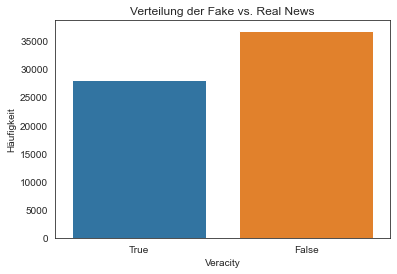

In [43]:
import matplotlib.pyplot as plt
sns.set_style('white')
sns.countplot(completeDataset['veracity'])
plt.title('Verteilung der Fake vs. Real News')
plt.ylabel('Häufigkeit')
plt.xlabel('Veracity')

In [44]:
completeDataset.isnull().sum()

Unnamed: 0        0
title           711
text             69
source        23481
veracity         64
set               0
subject       30338
date          30338
dtype: int64

Text(0.5, 0, 'Subject')

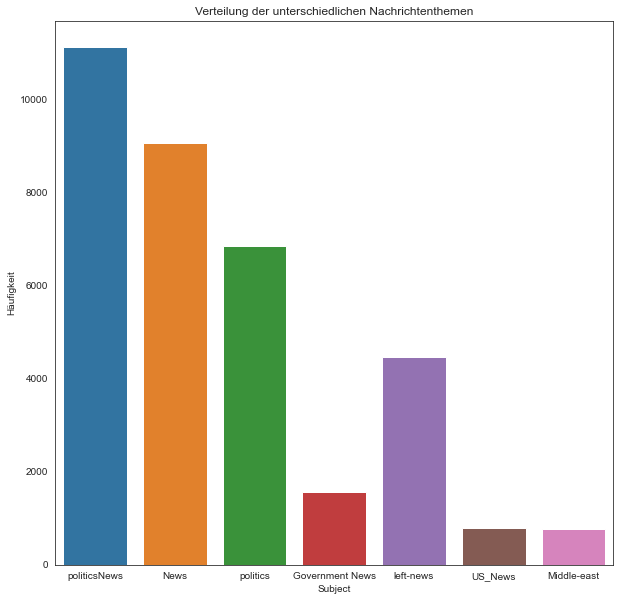

In [45]:
completeDataset['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style('white')
sns.countplot(completeDataset['subject'])
plt.title('Verteilung der unterschiedlichen Nachrichtenthemen')
plt.ylabel('Häufigkeit')
plt.xlabel('Subject')

Es gibt Nachrichten zu 7 Themen. Die größte Anzahl von Nachrichten stammen aus politicsNews. 

#### 6.3 Datenbereinigung und Vorbereitung

Um in der weiteren Analyse die richtigen Nachrichten mit den Fake Nachrichten vergleichen zu können, wird der Datensatz in True und False aufgeteilt.

In [46]:
String_False = completeDataset["veracity"][60000] # Get veracity from Row 60000-> True 
String_False

False

In [47]:
String_True = completeDataset["veracity"][30338] # Get veracity from Row 30338-> True 
String_True

True

In [48]:
completeDataset_True = completeDataset.loc[completeDataset['veracity'] == String_True]

In [49]:
completeDataset_True.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28092 entries, 0 to 41453
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28092 non-null  int64 
 1   title       28076 non-null  object
 2   text        28077 non-null  object
 3   source      28092 non-null  object
 4   veracity    28092 non-null  object
 5   set         28092 non-null  object
 6   subject     11116 non-null  object
 7   date        11116 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [50]:
completeDataset_false = completeDataset.loc[completeDataset['veracity'] == String_False] 

In [51]:
completeDataset_false.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36779 entries, 19 to 64934
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  36779 non-null  int64 
 1   title       36085 non-null  object
 2   text        36725 non-null  object
 3   source      13298 non-null  object
 4   veracity    36779 non-null  object
 5   set         36779 non-null  object
 6   subject     23481 non-null  object
 7   date        23481 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


#### 6.3.1 Datenbereinigung

#### Schritt 1 - Entfernung von News mit leerem Inhalt

Zeilen mit leerem Inhalt (Text) werden aus dem Datensatz entfernt und für die weitere Analyse nicht weiter berücksichtigt. 

In [52]:
prepData_true= completeDataset_True.dropna(subset=['text'])

In [53]:
prepData_false= completeDataset_false.dropna(subset=['text'])

#### Schritt 2 - Numerische Werte entfernen

Die Funktion RemoveNumbers( ) dient zur Entfernung von Zahlenwerte im Text

In [54]:
def RemoveNumbers(text):
    result = ''.join(c for c in text if not c.isnumeric())
    return result

In [55]:
prepData_false['text']=prepData_false['text'].apply(lambda x:RemoveNumbers(x))

<ipython-input-55-182f4945d9d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text']=prepData_false['text'].apply(lambda x:RemoveNumbers(x))


In [56]:
prepData_true['text']=prepData_true['text'].apply(lambda x:RemoveNumbers(x))

<ipython-input-56-ec792904f2a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text']=prepData_true['text'].apply(lambda x:RemoveNumbers(x))


#### Schritt 3 - Normalisierung der Dateninhalte

In [57]:
def Normalize(lst):
    result = unicodedata.normalize('NFKD', lst)
    return result

In [58]:
prepData_true['text']=prepData_true['text'].apply(lambda x: Normalize(x))

<ipython-input-58-a809866f821b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text']=prepData_true['text'].apply(lambda x: Normalize(x))


In [59]:
prepData_false['text']=prepData_false['text'].apply(lambda x: Normalize(x))

<ipython-input-59-d79fa00601af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text']=prepData_false['text'].apply(lambda x: Normalize(x))


####  Schritt 4 : Bereinigung von Satzzeichen

Im folgenden Schritt werden Satzzeichen bereinigt. Die  Bibliothek "string" hat 32 Satzzeichen. Die Satzzeichen sind:

In [60]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Die Funktion remove_punctuation( ) dient zur Entfernung von Satzzeichen im Text

In [61]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [62]:
prepData_true['text_wo_punct']=prepData_true['text'].apply(lambda x: remove_punctuation(x))
prepData_true.head()

<ipython-input-62-12e3daaa3f4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text_wo_punct']=prepData_true['text'].apply(lambda x: remove_punctuation(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,With the Hillary ClintonDonald Trump debates u...
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,As police today captured the man wanted for qu...
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,One day after explosive devices were discovere...
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,Ahmad Khan Rahami earlier named a person of in...
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,Donald Trumps surrogates and leading supporter...


In [63]:
prepData_false['text_wo_punct']=prepData_false['text'].apply(lambda x: remove_punctuation(x))
prepData_false.head()

<ipython-input-63-7ee13a23d576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text_wo_punct']=prepData_false['text'].apply(lambda x: remove_punctuation(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct
19,19,Report: George HW Bush to Vote for Hillary Cli...,Former President George H.W. Bush plans to vot...,http://abcnews.go.com/Politics/report-george-h...,False,marc,NaN,NaN,Former President George HW Bush plans to vote ...
36,36,George HW Bush Says He'll Vote for Hillary Cli...,Former President George H.W. Bush said he will...,http://abcnews.go.com/Politics/george-hw-bush-...,False,marc,NaN,NaN,Former President George HW Bush said he will b...
96,96,NaN,Eric Trump makes up one-half of the Trump Brot...,http://winningdemocrats.com/eric-trumps-greate...,False,marc,NaN,NaN,Eric Trump makes up onehalf of the Trump Broth...
97,97,"Trump Has Meltdown On CNN, Gets Called Out For...","In a particularly tense interview on CNN, Trum...",http://news.groopspeak.com/trump-has-meltdown-...,False,marc,NaN,NaN,In a particularly tense interview on CNN Trump...
105,105,John Kasich Tells GOP Chair Reince Priebus To ...,Reince Priebus openly threatened Kasich and ot...,http://www.addictinginfo.org/2016/09/19/john-k...,False,marc,NaN,NaN,Reince Priebus openly threatened Kasich and ot...


#### Schritt 5: Tokenisierung

Tokenisierung ist der Prozess der Aufteilung von Strings in eine Liste von Wörtern. Hierfür wurde die Funktion tokenize( ) geschrieben, welche reguläre Ausdrücke beinhaltet. 

 Mit "\W+" wird der String auf ein oder mehrere Nicht-Wortzeichen aufgespaltet

In [64]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split

True News: 

In [65]:
prepData_true['text_wo_punct_split']=prepData_true['text_wo_punct'].apply(lambda x: tokenize(x.lower()))
prepData_true.head()

<ipython-input-65-bcf943b83d0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text_wo_punct_split']=prepData_true['text_wo_punct'].apply(lambda x: tokenize(x.lower()))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,With the Hillary ClintonDonald Trump debates u...,"[with, the, hillary, clintondonald, trump, deb..."
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,As police today captured the man wanted for qu...,"[as, police, today, captured, the, man, wanted..."
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,One day after explosive devices were discovere...,"[one, day, after, explosive, devices, were, di..."
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,Ahmad Khan Rahami earlier named a person of in...,"[ahmad, khan, rahami, earlier, named, a, perso..."
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,Donald Trumps surrogates and leading supporter...,"[donald, trumps, surrogates, and, leading, sup..."


Fake News: 

In [66]:
prepData_false['text_wo_punct_split']=prepData_false['text_wo_punct'].apply(lambda x: tokenize(x.lower()))
prepData_false.head()

<ipython-input-66-d9d8fab1c4a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text_wo_punct_split']=prepData_false['text_wo_punct'].apply(lambda x: tokenize(x.lower()))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split
19,19,Report: George HW Bush to Vote for Hillary Cli...,Former President George H.W. Bush plans to vot...,http://abcnews.go.com/Politics/report-george-h...,False,marc,NaN,NaN,Former President George HW Bush plans to vote ...,"[former, president, george, hw, bush, plans, t..."
36,36,George HW Bush Says He'll Vote for Hillary Cli...,Former President George H.W. Bush said he will...,http://abcnews.go.com/Politics/george-hw-bush-...,False,marc,NaN,NaN,Former President George HW Bush said he will b...,"[former, president, george, hw, bush, said, he..."
96,96,NaN,Eric Trump makes up one-half of the Trump Brot...,http://winningdemocrats.com/eric-trumps-greate...,False,marc,NaN,NaN,Eric Trump makes up onehalf of the Trump Broth...,"[eric, trump, makes, up, onehalf, of, the, tru..."
97,97,"Trump Has Meltdown On CNN, Gets Called Out For...","In a particularly tense interview on CNN, Trum...",http://news.groopspeak.com/trump-has-meltdown-...,False,marc,NaN,NaN,In a particularly tense interview on CNN Trump...,"[in, a, particularly, tense, interview, on, cn..."
105,105,John Kasich Tells GOP Chair Reince Priebus To ...,Reince Priebus openly threatened Kasich and ot...,http://www.addictinginfo.org/2016/09/19/john-k...,False,marc,NaN,NaN,Reince Priebus openly threatened Kasich and ot...,"[reince, priebus, openly, threatened, kasich, ..."


#### Schritt 6: Stopwords

Im nächsten Schritt werden Stoppwörter entfernt. Stoppwörter sind irrelevante Wörter, die bei der Identifizierung eines Textes als echt oder gefälscht nicht helfen werden. Wir verwenden die "nltk"-Bibliothek für Stoppwörter und erweitern diese mit zusätzlichen Stoppwörter.

In [88]:
ADDITIONAL_STOPWORDS = ['covfefe','o','μa','μ','oa','imag','via','aa']

stopword = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
print(stopword[:13])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd"]


Die Funktion remove_stopwords() iteriert über alle Texte und entfernt Stoppwörter.

In [89]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text

True News:

In [90]:
prepData_true['text_wo_punct_split_wo_stopwords'] = prepData_true['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))
prepData_true.head()

<ipython-input-90-7cf10455f58c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text_wo_punct_split_wo_stopwords'] = prepData_true['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,With the Hillary ClintonDonald Trump debates u...,"[with, the, hillary, clintondonald, trump, deb...","[hillary, clintondonald, trump, debates, upon,...","[hillari, clintondonald, trump, debat, upon, u..."
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,As police today captured the man wanted for qu...,"[as, police, today, captured, the, man, wanted...","[police, today, captured, man, wanted, questio...","[polic, today, captur, man, want, question, co..."
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,One day after explosive devices were discovere...,"[one, day, after, explosive, devices, were, di...","[one, day, explosive, devices, discovered, man...","[one, day, explos, devic, discov, manhattan, n..."
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,Ahmad Khan Rahami earlier named a person of in...,"[ahmad, khan, rahami, earlier, named, a, perso...","[ahmad, khan, rahami, earlier, named, person, ...","[ahmad, khan, rahami, earlier, name, person, i..."
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,Donald Trumps surrogates and leading supporter...,"[donald, trumps, surrogates, and, leading, sup...","[donald, trumps, surrogates, leading, supporte...","[donald, trump, surrog, lead, support, sunday,..."


Fake News:

In [91]:
prepData_false['text_wo_punct_split_wo_stopwords'] = prepData_false['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))
prepData_false.head()

<ipython-input-91-42f510847f7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text_wo_punct_split_wo_stopwords'] = prepData_false['text_wo_punct_split'].apply(lambda x: remove_stopwords(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
19,19,Report: George HW Bush to Vote for Hillary Cli...,Former President George H.W. Bush plans to vot...,http://abcnews.go.com/Politics/report-george-h...,False,marc,NaN,NaN,Former President George HW Bush plans to vote ...,"[former, president, george, hw, bush, plans, t...","[former, president, george, hw, bush, plans, v...","[former, presid, georg, hw, bush, plan, vote, ..."
36,36,George HW Bush Says He'll Vote for Hillary Cli...,Former President George H.W. Bush said he will...,http://abcnews.go.com/Politics/george-hw-bush-...,False,marc,NaN,NaN,Former President George HW Bush said he will b...,"[former, president, george, hw, bush, said, he...","[former, president, george, hw, bush, said, vo...","[former, presid, georg, hw, bush, said, vote, ..."
96,96,NaN,Eric Trump makes up one-half of the Trump Brot...,http://winningdemocrats.com/eric-trumps-greate...,False,marc,NaN,NaN,Eric Trump makes up onehalf of the Trump Broth...,"[eric, trump, makes, up, onehalf, of, the, tru...","[eric, trump, makes, onehalf, trump, brothers,...","[eric, trump, make, onehalf, trump, brother, b..."
97,97,"Trump Has Meltdown On CNN, Gets Called Out For...","In a particularly tense interview on CNN, Trum...",http://news.groopspeak.com/trump-has-meltdown-...,False,marc,NaN,NaN,In a particularly tense interview on CNN Trump...,"[in, a, particularly, tense, interview, on, cn...","[particularly, tense, interview, cnn, trump, c...","[particular, tens, interview, cnn, trump, call..."
105,105,John Kasich Tells GOP Chair Reince Priebus To ...,Reince Priebus openly threatened Kasich and ot...,http://www.addictinginfo.org/2016/09/19/john-k...,False,marc,NaN,NaN,Reince Priebus openly threatened Kasich and ot...,"[reince, priebus, openly, threatened, kasich, ...","[reince, priebus, openly, threatened, kasich, ...","[reinc, priebus, open, threaten, kasich, repub..."


#### Schritt 7: Stemming

Stemming und Lemmatisierung ist der Prozess der Reduzierung eines Wortes auf seine Stammform. Der Hauptzweck besteht darin, Variationen desselben Wortes zu reduzieren und dadurch den Korpus der Wörter zu verringern, die wir in das Modell aufnehmen. Der Unterschied zwischen Stemming und Lemmatisierung besteht darin, dass beim Stemming das Ende des Wortes abgeschnitten wird, ohne den Kontext des Wortes zu berücksichtigen. Bei der Lemmatisierung hingegen wird der Kontext des Wortes berücksichtigt und das Wort auf der Grundlage der Wörterbuchdefinition in seine Stammform verkürzt. Stemming ist im Vergleich zu Lemmantizing ein schnellerer Prozess.

In [92]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

True News:

In [93]:
prepData_true['text_wo_punct_split_wo_stopwords_stemmed'] = prepData_true['text_wo_punct_split_wo_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])
prepData_true.head()

<ipython-input-93-677819446ff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text_wo_punct_split_wo_stopwords_stemmed'] = prepData_true['text_wo_punct_split_wo_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,With the Hillary ClintonDonald Trump debates u...,"[with, the, hillary, clintondonald, trump, deb...","[hillary, clintondonald, trump, debates, upon,...","[hillari, clintondonald, trump, debat, upon, u..."
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,As police today captured the man wanted for qu...,"[as, police, today, captured, the, man, wanted...","[police, today, captured, man, wanted, questio...","[polic, today, captur, man, want, question, co..."
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,One day after explosive devices were discovere...,"[one, day, after, explosive, devices, were, di...","[one, day, explosive, devices, discovered, man...","[one, day, explos, devic, discov, manhattan, n..."
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,Ahmad Khan Rahami earlier named a person of in...,"[ahmad, khan, rahami, earlier, named, a, perso...","[ahmad, khan, rahami, earlier, named, person, ...","[ahmad, khan, rahami, earlier, name, person, i..."
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,Donald Trumps surrogates and leading supporter...,"[donald, trumps, surrogates, and, leading, sup...","[donald, trumps, surrogates, leading, supporte...","[donald, trump, surrog, lead, support, sunday,..."


Fake News:

In [94]:
prepData_false['text_wo_punct_split_wo_stopwords_stemmed'] = prepData_false['text_wo_punct_split_wo_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])
prepData_false.head()

<ipython-input-94-718cc0caa1f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text_wo_punct_split_wo_stopwords_stemmed'] = prepData_false['text_wo_punct_split_wo_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x])


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
19,19,Report: George HW Bush to Vote for Hillary Cli...,Former President George H.W. Bush plans to vot...,http://abcnews.go.com/Politics/report-george-h...,False,marc,NaN,NaN,Former President George HW Bush plans to vote ...,"[former, president, george, hw, bush, plans, t...","[former, president, george, hw, bush, plans, v...","[former, presid, georg, hw, bush, plan, vote, ..."
36,36,George HW Bush Says He'll Vote for Hillary Cli...,Former President George H.W. Bush said he will...,http://abcnews.go.com/Politics/george-hw-bush-...,False,marc,NaN,NaN,Former President George HW Bush said he will b...,"[former, president, george, hw, bush, said, he...","[former, president, george, hw, bush, said, vo...","[former, presid, georg, hw, bush, said, vote, ..."
96,96,NaN,Eric Trump makes up one-half of the Trump Brot...,http://winningdemocrats.com/eric-trumps-greate...,False,marc,NaN,NaN,Eric Trump makes up onehalf of the Trump Broth...,"[eric, trump, makes, up, onehalf, of, the, tru...","[eric, trump, makes, onehalf, trump, brothers,...","[eric, trump, make, onehalf, trump, brother, b..."
97,97,"Trump Has Meltdown On CNN, Gets Called Out For...","In a particularly tense interview on CNN, Trum...",http://news.groopspeak.com/trump-has-meltdown-...,False,marc,NaN,NaN,In a particularly tense interview on CNN Trump...,"[in, a, particularly, tense, interview, on, cn...","[particularly, tense, interview, cnn, trump, c...","[particular, tens, interview, cnn, trump, call..."
105,105,John Kasich Tells GOP Chair Reince Priebus To ...,Reince Priebus openly threatened Kasich and ot...,http://www.addictinginfo.org/2016/09/19/john-k...,False,marc,NaN,NaN,Reince Priebus openly threatened Kasich and ot...,"[reince, priebus, openly, threatened, kasich, ...","[reince, priebus, openly, threatened, kasich, ...","[reinc, priebus, open, threaten, kasich, repub..."


#### Schritt 8. Bereinigung von leeren Elementen in Listen

Siehe Beispiel Liste (81):

Das letzte Element in der untenstehenden Liste beinhaltet ein leeres Element.

In [95]:
prepData_true['text_wo_punct_split_wo_stopwords_stemmed'][81]

['hillari',
 'clinton',
 'donald',
 'trump',
 'usher',
 'presidenti',
 'campaign',
 'new',
 'phase',
 'tonight',
 'plenti',
 'barb',
 'two',
 'candid',
 'face',
 'first',
 'general',
 'elect',
 'debat',
 'hofstra',
 'univers',
 'long',
 'island',
 'new',
 'york',
 'front',
 'expect',
 'histor',
 'number',
 'televis',
 'viewer',
 'moment',
 'matter',
 'first',
 'general',
 'elect',
 'presidenti',
 'debat',
 'hillari',
 'clinton',
 'donald',
 'trump',
 'lob',
 'insult',
 'far',
 'away',
 'month',
 'tonight',
 'tri',
 'start',
 'high',
 'anticip',
 'face',
 'genteel',
 'note',
 'although',
 'mutual',
 'contempt',
 'surfac',
 'clinton',
 'walk',
 'red',
 'pantsuit',
 'trump',
 'blue',
 'tie',
 'opponentsa',
 'trade',
 'tradit',
 'parti',
 'color',
 'two',
 'shook',
 'hand',
 'clinton',
 'said',
 'donalda',
 'perhap',
 'tri',
 'throw',
 'top',
 'warm',
 'greet',
 'short',
 'debat',
 'began',
 'trump',
 'talk',
 'oversea',
 'trade',
 'deal',
 'say',
 'fair',
 'secretari',
 'clintona',
 'stop

Die Funktion RemoveEmptyElements( ) iteriert über alle Wortlisten und bereinigt leere Elemente

In [96]:
def RemoveEmptyElements(lst):
    result= list(filter(None,lst)) 
    return result

True News:

In [97]:
prepData_true['text_wo_punct_split_wo_stopwords_stemmed']=prepData_true['text_wo_punct_split_wo_stopwords_stemmed'].apply(lambda x: RemoveEmptyElements(x))
prepData_true.head()

<ipython-input-97-414032160fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_true['text_wo_punct_split_wo_stopwords_stemmed']=prepData_true['text_wo_punct_split_wo_stopwords_stemmed'].apply(lambda x: RemoveEmptyElements(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
0,0,The Impact of Debates? It's Debatable,With the Hillary Clinton-Donald Trump debates ...,http://abcnews.go.com/Politics/impact-debates-...,True,marc,NaN,NaN,With the Hillary ClintonDonald Trump debates u...,"[with, the, hillary, clintondonald, trump, deb...","[hillary, clintondonald, trump, debates, upon,...","[hillari, clintondonald, trump, debat, upon, u..."
1,1,Details Emerge About NYC Bomb Suspect Ahmad Kh...,As police today captured the man wanted for qu...,http://abcnews.go.com/US/source-suspect-wanted...,True,marc,NaN,NaN,As police today captured the man wanted for qu...,"[as, police, today, captured, the, man, wanted...","[police, today, captured, man, wanted, questio...","[polic, today, captur, man, want, question, co..."
2,2,Donald Trump Repeats Calls for Police Profilin...,One day after explosive devices were discovere...,http://abcnews.go.com/Politics/donald-trump-re...,True,marc,NaN,NaN,One day after explosive devices were discovere...,"[one, day, after, explosive, devices, were, di...","[one, day, explosive, devices, discovered, man...","[one, day, explos, devic, discov, manhattan, n..."
3,3,"NY, NJ Bombings Suspect Charged With Attempted...","Ahmad Khan Rahami, earlier named a person of i...",http://abcnews.go.com/US/bombing-incidences-ny...,True,marc,NaN,NaN,Ahmad Khan Rahami earlier named a person of in...,"[ahmad, khan, rahami, earlier, named, a, perso...","[ahmad, khan, rahami, earlier, named, person, ...","[ahmad, khan, rahami, earlier, name, person, i..."
4,4,Trump Surrogates Push Narrative That Clinton S...,Donald Trump's surrogates and leading supporte...,http://abcnews.go.com/Politics/trump-surrogate...,True,marc,NaN,NaN,Donald Trumps surrogates and leading supporter...,"[donald, trumps, surrogates, and, leading, sup...","[donald, trumps, surrogates, leading, supporte...","[donald, trump, surrog, lead, support, sunday,..."


Fake News:

In [98]:
prepData_false['text_wo_punct_split_wo_stopwords_stemmed']=prepData_false['text_wo_punct_split_wo_stopwords_stemmed'].apply(lambda x: RemoveEmptyElements(x))
prepData_false.head()

<ipython-input-98-d80604c3cea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prepData_false['text_wo_punct_split_wo_stopwords_stemmed']=prepData_false['text_wo_punct_split_wo_stopwords_stemmed'].apply(lambda x: RemoveEmptyElements(x))


,Unnamed: 0,title,text,source,veracity,set,subject,date,text_wo_punct,text_wo_punct_split,text_wo_punct_split_wo_stopwords,text_wo_punct_split_wo_stopwords_stemmed
19,19,Report: George HW Bush to Vote for Hillary Cli...,Former President George H.W. Bush plans to vot...,http://abcnews.go.com/Politics/report-george-h...,False,marc,NaN,NaN,Former President George HW Bush plans to vote ...,"[former, president, george, hw, bush, plans, t...","[former, president, george, hw, bush, plans, v...","[former, presid, georg, hw, bush, plan, vote, ..."
36,36,George HW Bush Says He'll Vote for Hillary Cli...,Former President George H.W. Bush said he will...,http://abcnews.go.com/Politics/george-hw-bush-...,False,marc,NaN,NaN,Former President George HW Bush said he will b...,"[former, president, george, hw, bush, said, he...","[former, president, george, hw, bush, said, vo...","[former, presid, georg, hw, bush, said, vote, ..."
96,96,NaN,Eric Trump makes up one-half of the Trump Brot...,http://winningdemocrats.com/eric-trumps-greate...,False,marc,NaN,NaN,Eric Trump makes up onehalf of the Trump Broth...,"[eric, trump, makes, up, onehalf, of, the, tru...","[eric, trump, makes, onehalf, trump, brothers,...","[eric, trump, make, onehalf, trump, brother, b..."
97,97,"Trump Has Meltdown On CNN, Gets Called Out For...","In a particularly tense interview on CNN, Trum...",http://news.groopspeak.com/trump-has-meltdown-...,False,marc,NaN,NaN,In a particularly tense interview on CNN Trump...,"[in, a, particularly, tense, interview, on, cn...","[particularly, tense, interview, cnn, trump, c...","[particular, tens, interview, cnn, trump, call..."
105,105,John Kasich Tells GOP Chair Reince Priebus To ...,Reince Priebus openly threatened Kasich and ot...,http://www.addictinginfo.org/2016/09/19/john-k...,False,marc,NaN,NaN,Reince Priebus openly threatened Kasich and ot...,"[reince, priebus, openly, threatened, kasich, ...","[reince, priebus, openly, threatened, kasich, ...","[reinc, priebus, open, threaten, kasich, repub..."


#### Schritt 9. Zusammenfassung  

Zusammenfassung der Wortlisten in eine verschachtelte und nicht verschachtelte Liste

#### True News: 

In [99]:
dataset_true = []
dataset_true_extend=[]
for index, row in prepData_true.iterrows():
    dataset_true.append(row.text_wo_punct_split_wo_stopwords_stemmed)
    dataset_true_extend.extend(row.text_wo_punct_split_wo_stopwords_stemmed)

#### Fake News: 

In [102]:
dataset_false = []
dataset_false_extend = []
for index, row in prepData_false.iterrows():
    dataset_false.append(row.text_wo_punct_split_wo_stopwords_stemmed)
    dataset_false_extend.extend(row.text_wo_punct_split_wo_stopwords_stemmed)

#### 6.3 Worthäufigkeiten

Wordcloud, um die häufigsten Wörter in unseren Daten zu analysieren

https://medium.com/analytics-vidhya/fake-news-detection-using-nlp-techniques-c2dc4be05f99

#### 6.4 N-Gramm Ranking

Ein n-Gramm ist eine Folge von n Wörtern, wobei n eine diskrete Zahl ist, die von 1 bis unendlich reichen kann.
Beim N-Gramm-Ranking werden die N-Gramme danach geordnet, wie oft sie in der Sammlung der Fake Nachrichten und True Nachrichten vorkommen.

Mit dem folgenden Code werden mit Hilfe der NLTK Bibliothek 2 Gramme sowie auch 3 Gramme gebildet und nach der Häufigkeit absteigend sortiert. Die häufigsten 10 n-Gramme der True-Nachrichten sowie auch der Fake-Nachrichten werden betrachtet.

In [105]:
twograms_true=(pd.Series(nltk.ngrams(dataset_true_extend,2)).value_counts())[:10]
trigrams_true=(pd.Series(nltk.ngrams(dataset_true_extend,3)).value_counts())[:10]
twograms_false=(pd.Series(nltk.ngrams(dataset_false_extend,2)).value_counts())[:10]
trigrams_false=(pd.Series(nltk.ngrams(dataset_false_extend,3)).value_counts())[:10]

Der folgende Code zeigt die Visualisierung der häufigsten 10 n-Gramme als Balkendiagramm. Auf der Y-Achse sind die n-gramms gelistet und auf der X-Achse ist die Anzahl der Vorkommnisse aufgezeigt. Die Darstellung zeigt die 10 häufigsten 2 gramms und darauffolgend die 10 häufigsten 3 grams.

Text(0.5, 0, 'Häufigkeit')

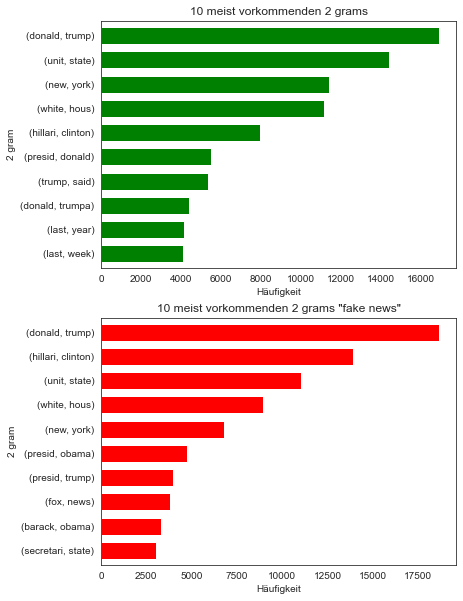

In [106]:
plt.figure(figsize=(30,20))
sns.set_style('white')

plt.subplot(2,2,1) #Anordnung der Plots
twograms_true.sort_values().plot.barh(color='green', width=.7, figsize=(14, 10)) #Plotart, Farbe und Größe absteigend sortiert
plt.title('10 meist vorkommenden 2 grams') #Titel des Plots
plt.ylabel('2 gram') #Y-Achsenbezeichnung
plt.xlabel('Häufigkeit') #X-Achsenbezeichnung

plt.subplot(2,2,3)
twograms_false.sort_values().plot.barh(color='red', width=.7, figsize=(14, 10))
plt.title('10 meist vorkommenden 2 grams "fake news"')
plt.ylabel('2 gram')
plt.xlabel('Häufigkeit')

Fünf der gelisteten 2-grams kommen sowohl bei den Fake-Nachrichten als auch bei den True-Nachrichten vor (Dobald, trump; hillari, clinton; unit, state; white-house; new, york). Die Häufigkeit varriiert, dies könnte auf die Verteilung im Datensatz zurückgeführt werden. 
Da es sich um Amerikanische Nachrichten mit der Hauptkategorie der Politik handelt, sind die Wörter nicht auffallend. Man kann hieraus zwar die Relevanz der Gesprächsthemen ableiten aber nicht ob es sich dadurch um ein Muster handelt.

Auch die genaure Betrachtung der 3-grams zeigt kein Muster auf. 

Text(0.5, 0, 'Häufigkeit')

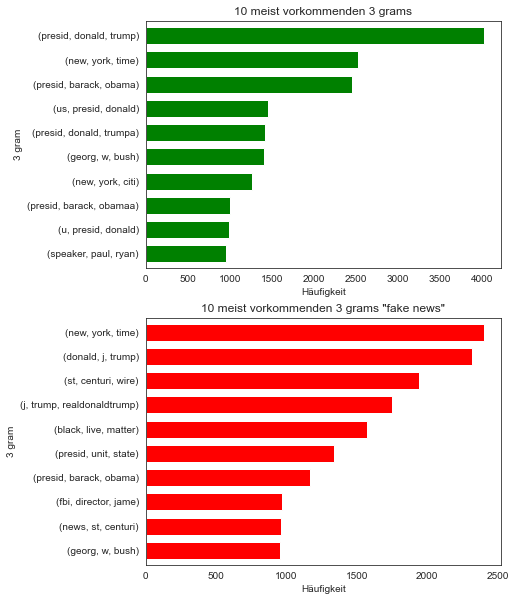

In [107]:
plt.figure(figsize=(30,20))
sns.set_style('white')

plt.subplot(2,2,1)
trigrams_true.sort_values().plot.barh(color='green', width=.7, figsize=(14, 10))
plt.title('10 meist vorkommenden 3 grams')
plt.ylabel('3 gram')
plt.xlabel('Häufigkeit')

plt.subplot(2,2,3)
trigrams_false.sort_values().plot.barh(color='red', width=.7, figsize=(14, 10))
plt.title('10 meist vorkommenden 3 grams "fake news"')
plt.ylabel('3 gram')
plt.xlabel('Häufigkeit')

#### 6.5 Association Rule

### 7. Interpretation der Ergebnisse

### 8. Ausblick

### 9. Quellenverzeichnis

https://seaborn.pydata.org/


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7250114/#:~:text=Some%20approaches%20detect%20fake%20news,story%20spread%20(Macaulay%202018).

Kai Shu, Amy Sliva, Suhang Wang, Jiliang Tang and Huan Liu (2017).
Fake News Detection on Social Media: A Data Mining Perspective.
https://dl.acm.org/doi/10.1145/3137597.3137600